Suppose we draw lots of dots on a big sheet of paper and then roll that sheet up into a cylinder. The dots, like the paper, are distributed in 3D space, but the paper itself (if we ignore its thickness!) is 2D. So we really have dots on a 2D surface that has been embedded in 3D space: If we unroll the paper, the dots will lie flat again. Manifold learning methods use this insight to reduce high dimensional data to fewer dimensions

Isomap is one such method, contained in the sklearn library. It calculates the distances between each point and its nearest neighbors, and then projects the data into a lower dimensional space while attempting to preserve those distances. The "nearest neighbors" qualifier is important: If we insist that the distance between each dot on the paper (from our example above) and every other dot remains the same, we won't be able to unroll the paper! On the other hand, if we only try to keep the distance between each dot and, say, its 3 closest neighbors the same, then we can unroll the paper and still maintain the spatial relationships between the dots.

This idea can be used to great effect on visual data. We can see at a glance what's going on with hundreds or thousands of images, and we will be able to see which images an ML algorithm might have trouble telling apart. Let's learn how this works using cupcake images that I scraped from the internet and converted into RGB thumbnails. We start by loading the images into python, flattening the numbers specifying each image into a 1D array, and plotting some of the original images just to get an idea of what we have.

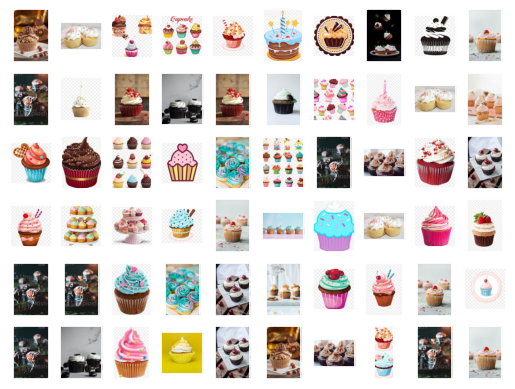

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.manifold import Isomap
from matplotlib import offsetbox

%matplotlib inline

directory = './cupcakes'

pics = []
data = pd.DataFrame()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # creating a object
        pics.append(Image.open(f))
        image = pd.Series(np.asarray(Image.open(f)).ravel())
        data = pd.concat([data,image.to_frame().T],ignore_index=True)

data = data.fillna(data.fillna(data.mean()))
fig, ax = plt.subplots(6,10,subplot_kw={'xticks':[],'yticks':[]})
for i, axi in enumerate(ax.flat):
    axi.imshow(pics[i])

Each 1D array represents one cupcake image, and can be thought of as a single point in a high dimensional space. Isomap will try to preserve the distance between each point and its 5 nearest neighbors as it projects the data into a lower dimensional space, in this case 2D space. After the data is projected into 2 dimensions, it's just a cloud of points that we can plot, which we do below but with the original thumbnail image shown right on top.

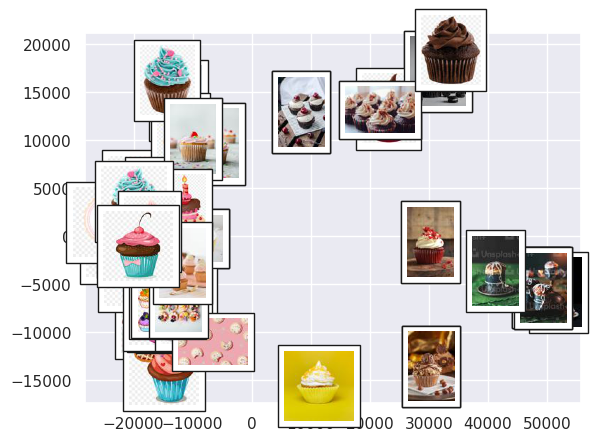

In [2]:
model = Isomap(n_components=2)
proj = model.fit_transform(data)

def plot_components(data, model, images=None, ax=None,
                    cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:,0],proj[:,1],'.k')

    if images is not None:
        for i in range(data.shape[0]):
            imagebox = offsetbox.AnnotationBbox( \
                offsetbox.OffsetImage(images[i],cmap=cmap, \
                                      zoom=0.5), \
                                      proj[i])
            ax.add_artist(imagebox)

plot_components(data,model=Isomap(n_components=2), \
                images=pics)

We see that the lighter images are toward the top, the darker toward the bottom, and the ones on the right have checkered backgrounds. We have gotten a structured overview of the dataset very quickly.